# Aprendizado de Máquina

# Alunos

* Alexandre Batistella Bellas, 9763168
* Moisés Botarro Ferraz Silva, 8504135

# Aula 02 - Exercício 01

## Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". 

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [1]:
import numpy as np
import pandas as pd

salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

n_sala = 1
for sala in salas:
    print("--- Sala: %d ---" % n_sala)
    print("Média: %f" % np.mean(sala))    
    n_sala += 1
n_sala = 0

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


Dessa forma, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2. 

- Demonstre o porquê dessa conclusão estar equivocada.

  - Dica: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

In [2]:
df = pd.DataFrame({'Sala 1':salas[0],
                    'Sala 2': salas[1]})

df

,Sala 1,Sala 2
0,42.344840,58.064151
1,100.000000,57.432729
2,100.000000,62.847655
3,0.000000,60.350696
4,0.000000,63.985701
5,44.841560,54.497176
6,53.441189,62.026916
7,100.000000,61.386221
8,47.999539,57.133430
9,62.019719,55.487166


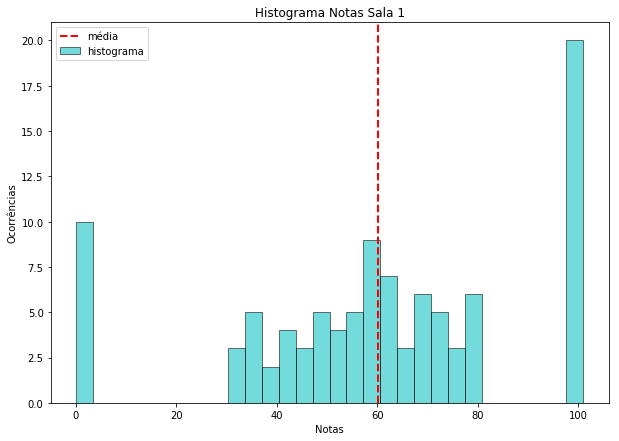

In [3]:
# Cálculo de hitogramas
import matplotlib.pyplot as plt
%matplotlib inline

sala1 = df['Sala 1']

plt.figure(figsize=(10,7))
result = plt.hist( sala1, bins=30, color='c', edgecolor='k', alpha=0.55, range=(0,101), label="histograma")
plt.title("Histograma Notas Sala 1")
plt.xlabel("Notas")
plt.ylabel("Ocorrências")
plt.axvline(sala1.mean(), color='r', linestyle='dashed', linewidth=2, label="média")
plt.legend()
plt.show()

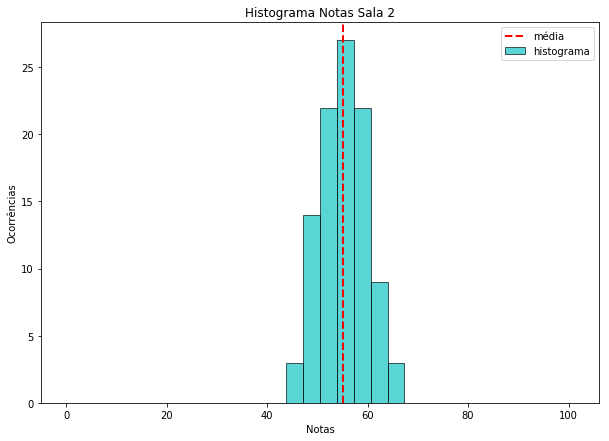

In [4]:
sala2 = df['Sala 2']

plt.figure(figsize=(10,7))
result = plt.hist(sala2, bins=30, color='c', edgecolor='k', alpha=0.65, range=(0,101), label="histograma")
plt.title("Histograma Notas Sala 2")
plt.xlabel("Notas")
plt.ylabel("Ocorrências")
plt.axvline(sala2.mean(), color='r', linestyle='dashed', linewidth=2, label="média")
plt.legend()
plt.show()

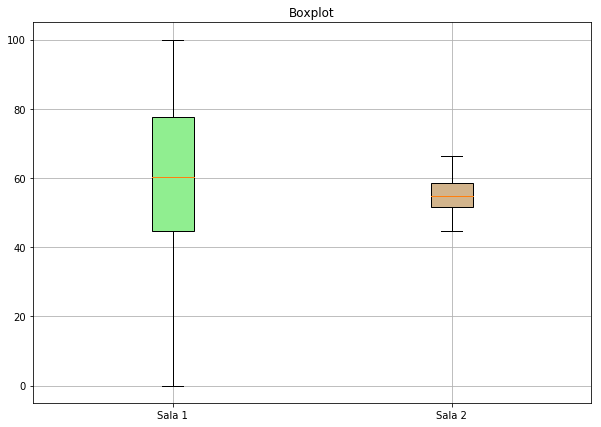

In [5]:
# Cálulo de Boxplot

plt.figure(figsize=(10,7))
plt.grid(True)
plt.title("Boxplot")
bp = plt.boxplot([df['Sala 1'], df['Sala 2']],labels=['Sala 1', 'Sala 2'], patch_artist=True, )

colors = ['lightgreen', 'tan']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

Pode-se observar que há uma maior dispersão dos dados na sala 1. Embora a média seja maior para essa sala, há uma maior presença de outliers, os quais influenciam no cálculo desse valor. 20% dos alunos tiraram 100, 10% tiraram 0 e os demais ficaram com notas entre 30 e 80. 

Observando o histograma e boxplot da sala 2, há uma maior consistência nas notas e elas se limitam ao intervalo entre 40 e 70. Pelo boxplot, vemos que à partir do quartil 1 as notas já são maiores do que 50, ou seja, sabemos que ao menos 75% da sala foi aprovada. 

---

Calcule o número de aprovados em cada uma das salas.
- Dica: Use a função `argwhere` da biblioteca **numpy**.

In [6]:
print("Aprovados sala 1: %d" % len(np.argwhere(salas[0]>50)))
print("Aprovados sala 2: %d" % len(np.argwhere(salas[1]>50)))

Aprovados sala 1: 68
Aprovados sala 2: 90


O número de aprovações acima confirmam as observações que foram feitas através do histograma e do boxplot.

## Dados multidimensionais

Considere o conjunto Iris, disponível no arquivo `iris.data`.  Ele contém 150 observações sobre 4 características medidas em 3 tipos de flores. 

O trecho de código abaixo carrega o conjunto, armazena-o na variável `iris` e exibe seu conteúdo.

In [7]:
import pandas as pd
import scipy as sp
import seaborn as sns

iris = pd.read_csv("iris.data", header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa




---


- Calcule os quatro momentos (média, variância, obliquidade e achatamento) de cada uma das quatro variáveis do conjunto.

  - Dica:  cada variável pode ser acessada da forma `iris[i]`, onde `i` é uma das 4 variáveis do conjunto (entre 0 e 3). Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy** para obliquidade (skew) e achatamento (kurtosis).

In [8]:
stats = pd.DataFrame(columns=['Média', 'Variância', 'Obliquidade', 'Achatamento'])

for i in range(0,4):
    stats.loc['Característica %d' % i] = [np.mean(iris[i]), np.var(iris[i]), sp.stats.skew(iris[i]), sp.stats.kurtosis(iris[i])]

stats.round(3)

,Média,Variância,Obliquidade,Achatamento
Característica 0,5.843,0.681,0.312,-0.574
Característica 1,3.054,0.187,0.331,0.241
Característica 2,3.759,3.092,-0.272,-1.395
Característica 3,1.199,0.579,-0.104,-1.335


---


- Calcule o histograma e o boxplot de cada uma das quatro variáveis do conjunto. Analise se os dados estão centrados (simetria) e estime qual intervalo contém 50% dos dados (intervalo entre primeiro e terceiro quartil).


## Histogramas

In [10]:
def hist_iris(i):
    data = iris[i]

    plt.figure(figsize=(10,7))
    result = plt.hist( data, bins=40, color='y', edgecolor='k', alpha=0.5, range=(min(data),max(data)+1), label="histograma")
    plt.title("Histograma Característica %d" % i)
    plt.xlabel("Valor")
    plt.ylabel("Ocorrências")
    plt.axvline(data.mean(), color='r', linestyle='dashed', linewidth=2, label="média")
    plt.legend()

    plt.show()

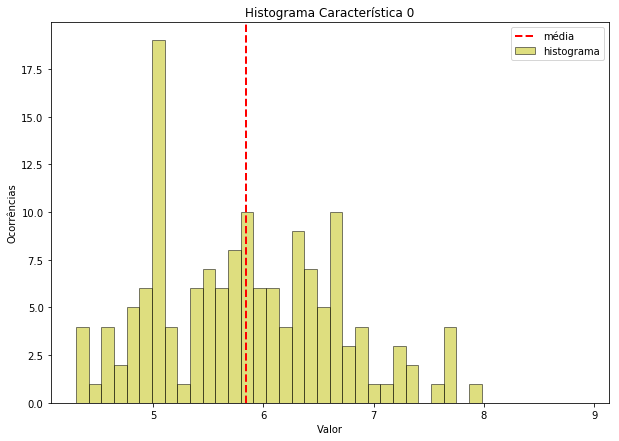

In [11]:
# Característica 0

hist_iris(0)

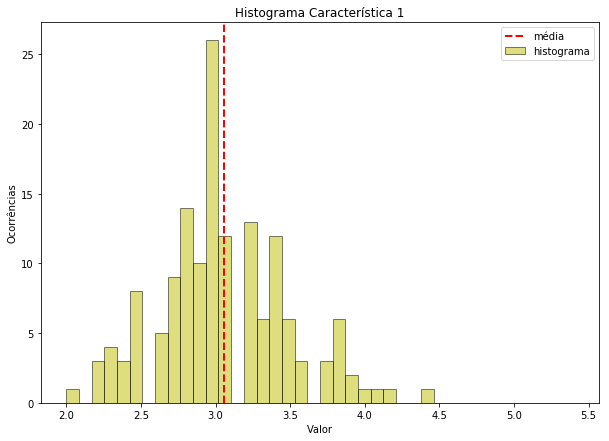

In [12]:
# Característica 1

hist_iris(1)

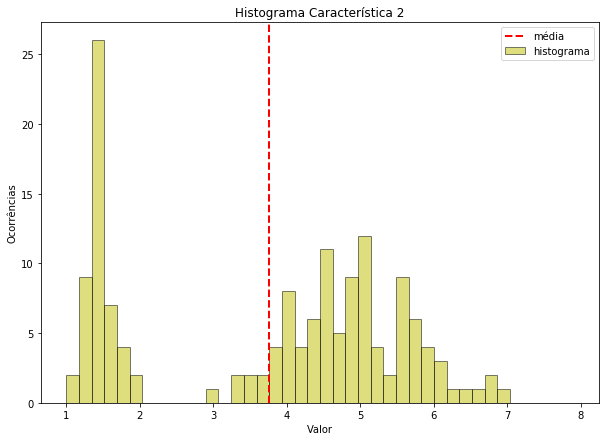

In [13]:
# Característica 2

hist_iris(2)

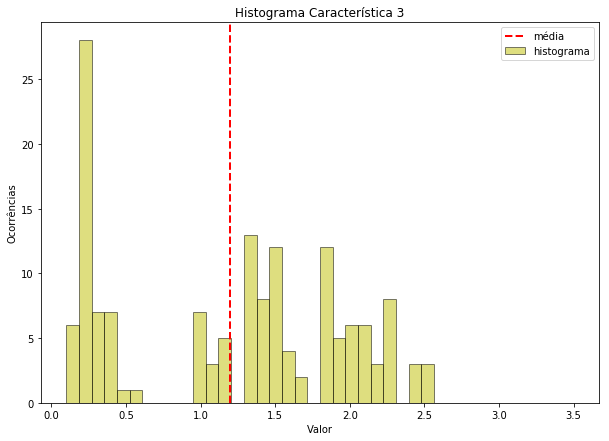

In [14]:
# Característica 3

hist_iris(3)

## Boxplot

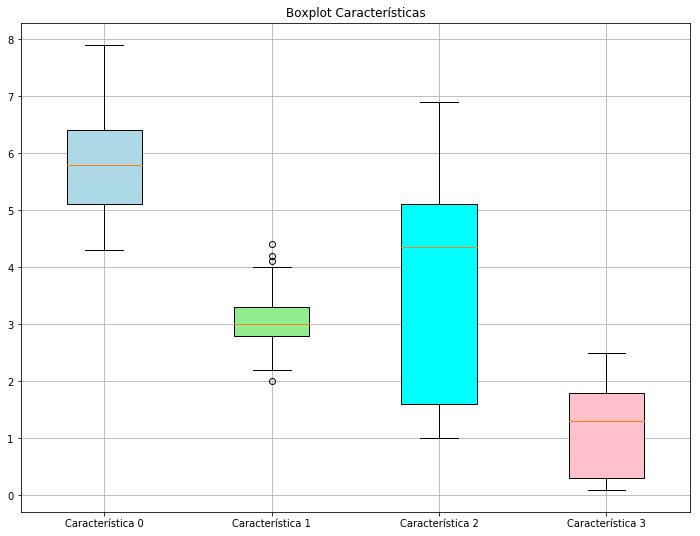

In [15]:
plt.figure(figsize=(12,9))
plt.grid(True)
plt.title("Boxplot Características")
bp = plt.boxplot([iris[i] for i in range(4)],labels=['Característica %d' % i for i in range(4)], patch_artist=True)

colors = ['lightblue', 'lightgreen', 'cyan', 'pink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

## Análise

### Simetria

A princípio, observando os histogramas, percebe-se uma certa simetria para as características 0 e 1, o que não ocorre com 3 e 4. Essa observação é confirmada ao plotar os boxplots na figura acima.

O histograma da característica 1 parece mais simétrico do que o da característica 0, uma vez que esta última possui dados com maior ocorrência longe da média. Porém, analisando os boxplots, verificamos que a mediana da característica 0 está mais centrada do que a da característica 1. 

Analisando apenas os valores de obliquidade, não podemos tirar conclusões exatas sobre a simetria dos dados. Isso se deve, provavelmente, ao tamanho das amostras utilizadas. Idealmente, deveríamos analisar um conjunto maior de dados.

### Intervalos

Analisando os boxplots, podemos inferir os seguintes valores para os intervalos entre os quartis 1 e 3 das características

#### Característica 0
[5.1, 6.4]

#### Característica 1
[2.8, 3.3]

#### Característica 2
[1.6, 5.1]

#### Característica 3
[0.3, 1.8]

Podemos verificar os valores exatos através da função *quantile*

In [16]:
for i in range(4):
    print("Característica %d" % i)
    print(iris[i].quantile([0.25,0.75]))

Característica 0
0.25    5.1
0.75    6.4
Name: 0, dtype: float64
Característica 1
0.25    2.8
0.75    3.3
Name: 1, dtype: float64
Característica 2
0.25    1.6
0.75    5.1
Name: 2, dtype: float64
Característica 3
0.25    0.3
0.75    1.8
Name: 3, dtype: float64


---


- Calcule o gráfico de dispersão entre todas as variáveis do conjunto para indicar uma possível relação entre as variáveis.
  - Dica: utilize a função `pairplot` da biblioteca **seaborn**

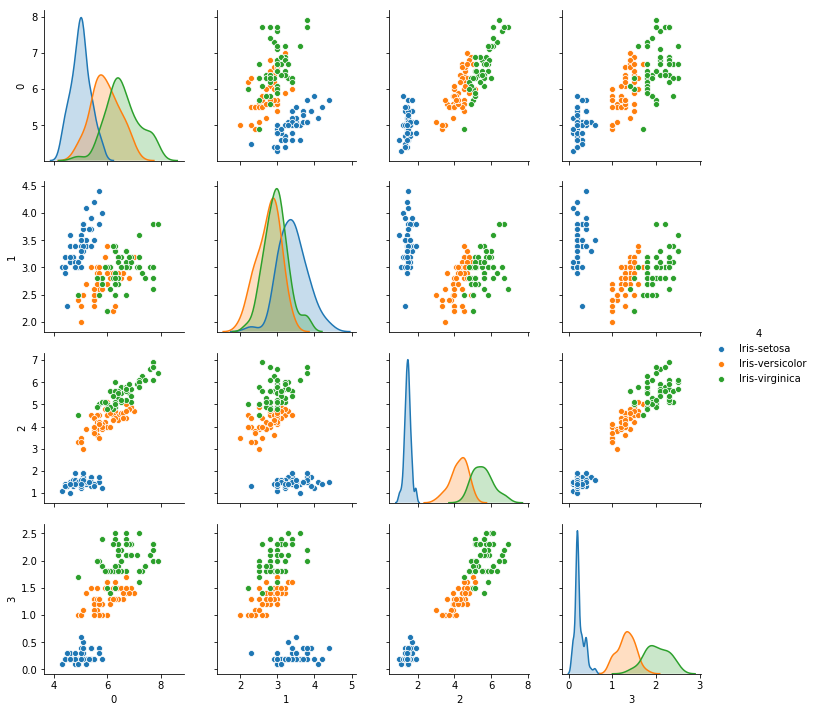

In [20]:
sns.pairplot(iris, hue=4)

Pelos gráficos, podemos observar uma relação próxima à linear entre as variáveis 0-2 e 2-3.



---

- Para obter um valor numérico sobre a relação entre as variáveis, calcule a matriz de covariância dos dados. Comente quais variáveis estão mais relacionadas e se há alguma relação com o gráfico gerado na questão anterior.
  - Dica: utilize a biblioteca a função `cov` da biblioteca **numpy**, com parâmetro `rowvar=False`.

In [18]:
cov = np.cov(iris.values[:,:4].astype(float), rowvar=False)
cov

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

Pelos valores da matriz de covariância, os valores das relações 0-2 e 2-3 são os maiores, o que indica uma correlação entre essas variáveis. Isso confirma a observação feita anteriormente através do pairplot.

Observa-se também que a covariância entre as variáveis 0 e 1 está próxima à 0, o que indica uma não correlação entre elas. Observando o pair plot, o espalhamento dos gráficos relacionados à essa combinação confirma essa análise.

Apenas pela análise dos valores, não podemos concluir se há uma anticorrelação entre as demais combinações de variáveis.



---

A magnitude da covariância não é um valor facilmente interpretável, pois não é um valor normalizado e portanto depende da magnitude das variáveis que foram usadas para seu cálculo. Dessa forma podemos utilizar o Coeficiente de correlação de Pearson para facilitar nossa análise.

- Calcule o coeficiente de correlação de Pearson para as variáveis do conjunto.
  - Dica: utilize a função `corrcoef` da biblioteca **numpy** com parâmetro `rowvar=False`.

In [19]:
corrcoef = np.corrcoef(iris.values[:,:4].astype(float), rowvar=False)
corrcoef

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

Os coeficientes de correlação de Pearson confirmam novamente as observações anteriores. No entanto, observa-se que existe também uma correlação entre as variáveis 0 e 3. É interessante notar que isso não foi percebido pela matriz de covariância devido à falta de normalização dos valores.

Também é possível notar uma não correlação entre as variáveis 0 e 1 uma vez que o coeficiente para essa relação é próximo a 0.

Como não há valores próximos à -1 na matriz, podemos concluir que não existe anti correlação entre as variáveis.